In [1]:
from generate_captchas import *

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

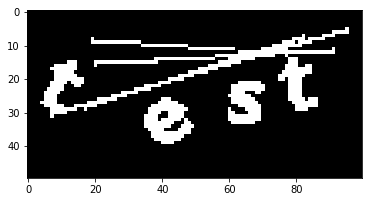

In [3]:
def show(img):
    plt.imshow(img, cmap=plt.get_cmap('gray'))
    plt.show()
    
show(generate_captcha('test'))

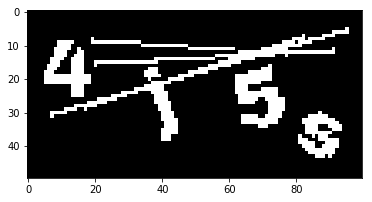

In [4]:
captchas = get_captchas()
show(preprocess(captchas[0]))

In [86]:
import keras
from keras.datasets import mnist
from keras.models import Model
from keras.layers import Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K

image = generate_captcha('test')
num_classes = len(ALPHABET) + 1

if K.image_data_format() == 'channels_first':
    input_shape = (1, 50, 100)
else:
    input_shape = (50, 100, 1)

image_input = Input(shape=input_shape, name='image')
x = Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape)(image_input)
x = Conv2D(64, (3, 3), activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Flatten()(x)
x = Dense(128, activation='relu')(x)
outputs = [Dense(num_classes, activation='softmax', name='p{}'.format(i))(x) for i in range(4)]

model = Model(inputs=[image_input], outputs=outputs)
model.compile(loss={'p{}'.format(i): 'categorical_crossentropy' for i in range(4)},
              #optimizer='adam',
              optimizer=keras.optimizers.Adam(lr=0.00001),
              metrics=['accuracy'])
model.summary()

____________________________________________________________________________________________________
Layer (type)                     Output Shape          Param #     Connected to                     
image (InputLayer)               (None, 50, 100, 1)    0                                            
____________________________________________________________________________________________________
conv2d_11 (Conv2D)               (None, 48, 98, 32)    320         image[0][0]                      
____________________________________________________________________________________________________
conv2d_12 (Conv2D)               (None, 46, 96, 64)    18496       conv2d_11[0][0]                  
____________________________________________________________________________________________________
max_pooling2d_6 (MaxPooling2D)   (None, 23, 48, 64)    0           conv2d_12[0][0]                  
___________________________________________________________________________________________

In [59]:
class_to_letter = '?' + ALPHABET
letter_to_class = {letter: i for i, letter in enumerate(class_to_letter)}

def get_example():
    text = generate_text()
    captcha = generate_captcha(text)
    x = np.reshape(captcha, input_shape)
    y = keras.utils.to_categorical([letter_to_class[c] for c in text], num_classes=num_classes)
    return x, y

def next_batch(batch_size=32):
    x, y = list(zip(*[get_example() for i in range(batch_size)]))
    return np.stack(x), list(np.stack(y).swapaxes(0, 1))

def batch_generator():
    while True:
        yield next_batch()
    
model.fit_generator(
    batch_generator(),
    steps_per_epoch=10,
    epochs=5,
    validation_data=batch_generator(),
    validation_steps=10)

Epoch 1/5
100/100 [==============================] - 88s - loss: 14.5458 - p0_loss: 3.6406 - p1_loss: 3.6357 - p2_loss: 3.6362 - p3_loss: 3.6333 - p0_acc: 0.0244 - p1_acc: 0.0325 - p2_acc: 0.0244 - p3_acc: 0.0259 - val_loss: 14.4563 - val_p0_loss: 3.6152 - val_p1_loss: 3.6111 - val_p2_loss: 3.6192 - val_p3_loss: 3.6107 - val_p0_acc: 0.0187 - val_p1_acc: 0.0187 - val_p2_acc: 0.0375 - val_p3_acc: 0.0187

In [ ]:
model.optimizer.lr.set_value(0.00001)
model.fit_generator(
    batch_generator(),
    steps_per_epoch=300,
    epochs=1,
    validation_data=batch_generator(),
    validation_steps=10)

Epoch 1/1
255/300 [========================>.....] - ETA: 39s - loss: 20.7017 - p0_loss: 5.1704 - p1_loss: 5.2135 - p2_loss: 5.1909 - p3_loss: 5.1269 - p0_acc: 0.0275 - p1_acc: 0.0235 - p2_acc: 0.0272 - p3_acc: 0.0304         

In [ ]:
def predict(x):
    x = np.array(x)
    outputs = model.predict(np.reshape(x, (len(x),) + input_shape))
    return [''.join(x) for x in zip(*[[class_to_letter[i] for i in np.argmax(output, axis=1)] for output in outputs])]

predict([generate_captcha('test'), generate_captcha('1234')])

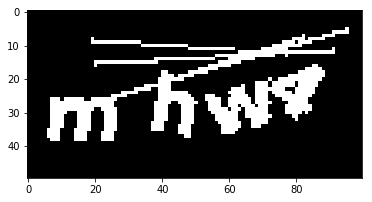

true:      mhw4
predicted: x7bf



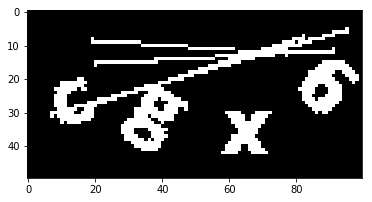

true:      cgx6
predicted: x7bf



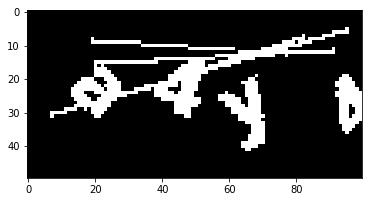

true:      a4y4
predicted: x7bf



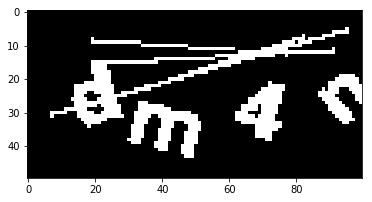

true:      dm4n
predicted: x7bf



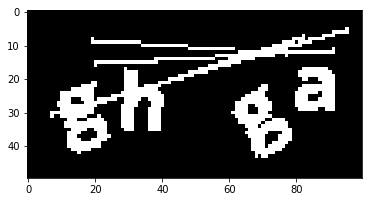

true:      ghga
predicted: x7bf



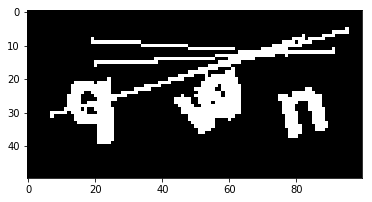

true:      qwon
predicted: x7bf



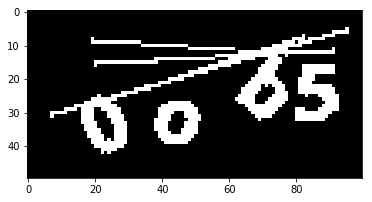

true:      0ob5
predicted: x7bf



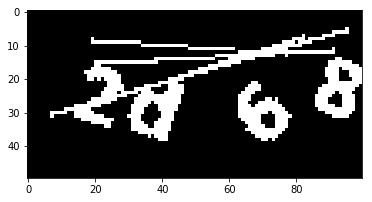

true:      2d68
predicted: x7bf



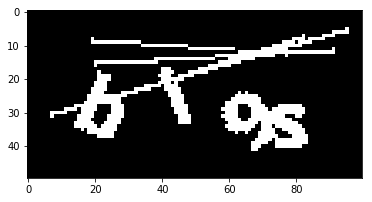

true:      bi9s
predicted: x7bf



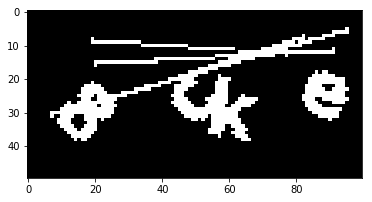

true:      8cke
predicted: x7bf



In [75]:
for i in range(10):
    text = generate_text()
    captcha = generate_captcha(text)
    show(captcha)
    prediction = predict([captcha])[0]
    print('true:     ', ''.join(text))
    print('predicted:', prediction)
    print()